In [171]:
import pandas as pd

In [172]:
# In my HW2, I scrapped the newspapers' name, description and some information in HK, but it seems that those data doesn't have 
# news value. 

# As for my HW3, I want to know the credibility rating of Hong Kong news media in rencent years in general. 
# Fortunately, I found a investigation held by HKU in this topic, so I supplemented the outcome to my analysis directely.
# Source: https://www.hkupop.hku.hk/english/popexpress/press/nm_credibility/index.html

df=pd.read_csv('Media Confidence.csv', header=[0])
df.columns=['Date','Rating','Error','Total Sample','Subsample','Number of rater','Recognition Rate']
df

,Date,Rating,Error,Total Sample,Subsample,Number of rater,Recognition Rate
0,4/10/2017,5.77,0.08,1024,515,508,98.70%
1,12/4/2017,5.69,0.08,1001,528,515,97.50%
2,22/9/2016,5.66,0.08,1012,543,534,98.40%
3,14/4/2016,5.87,0.08,1006,613,601,98.00%
4,30/9/2015,5.86,0.07,1046,607,600,98.90%
5,16/4/2015,5.72,0.07,1024,592,585,98.80%
6,30/9/2014,5.84,0.08,1032,649,633,97.50%
7,10/4/2014,6.01,0.09,1015,546,533,97.70%
8,31/10/2013,6.14,0.08,1022,539,530,98.40%
9,31/5/2013,6.01,0.07,1012,630,617,97.80%


In [173]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil import parser
import numpy

In [174]:
def parse_datetime(x):
    try:
        return parser.parse(x)
    except:
        return numpy.nan
df['datetime'] = df['Date'].apply(parse_datetime)

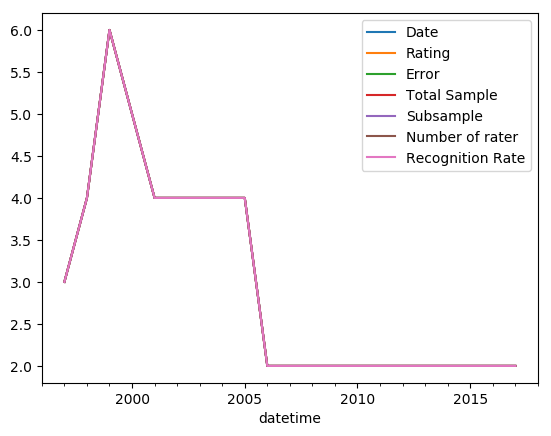

In [175]:
# To see the times of HKU to hand out questionnaire every year
df.set_index('datetime').resample('1y').aggregate('count').plot()

In [176]:
# To see the highest credibility of HK media
df[df['Rating']==df['Rating'].max()]

,Date,Rating,Error,Total Sample,Subsample,Number of rater,Recognition Rate,datetime
56,15/9/1998,6.58,0.06,510,510,491,96.30%,1998-09-15


In [177]:
# To see the lowest credibility of HK media
df[df['Rating']==df['Rating'].min()]

,Date,Rating,Error,Total Sample,Subsample,Number of rater,Recognition Rate,datetime
36,20/11/2002,5.46,0.06,1058,1058,977,92.30%,2002-11-20


Text(0.5,1,'Media Rating in Last 20 Years')

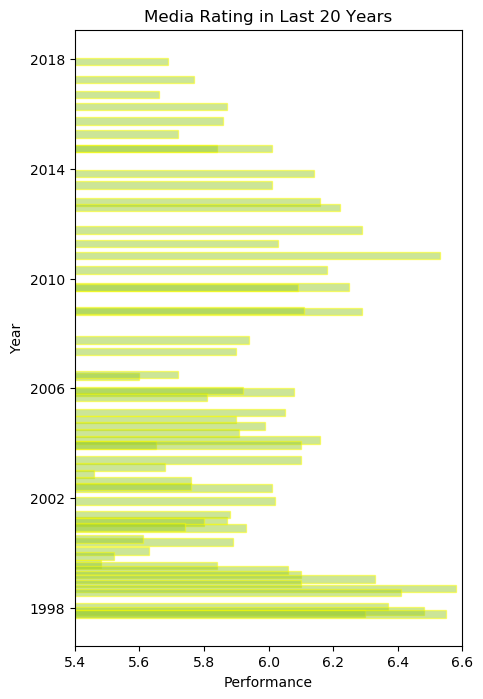

In [178]:
plt.figure(figsize=(5,8))

plt.barh(df['datetime'], df['Rating'], height=100, alpha=0.5,facecolor = 'yellowgreen',edgecolor = 'yellow')
plt.xlim(5.40,6.60)
plt.ylabel('Year')
plt.xlabel('Performance')
plt.title('Media Rating in Last 20 Years')


Text(95.7222,0.5,'Time')

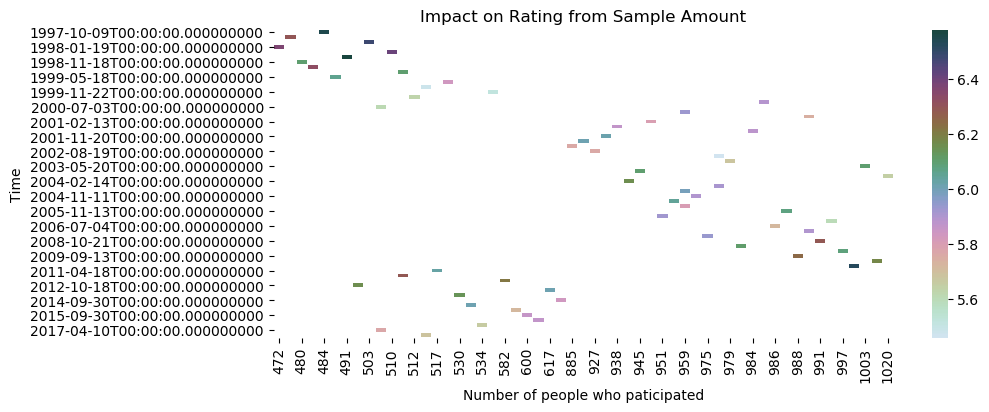

In [179]:
pt = df.pivot_table(index='datetime', columns='Number of rater', values='Rating', aggfunc=np.sum)
pt.head()
f, ax = plt.subplots(figsize = (10, 4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, cmap = cmap, linewidths = 0.05, ax = ax)

ax.set_title('Impact on Rating from Sample Amount')
ax.set_xlabel('Number of people who paticipated')
ax.set_ylabel('Time')


Text(95.7222,0.5,'Time')

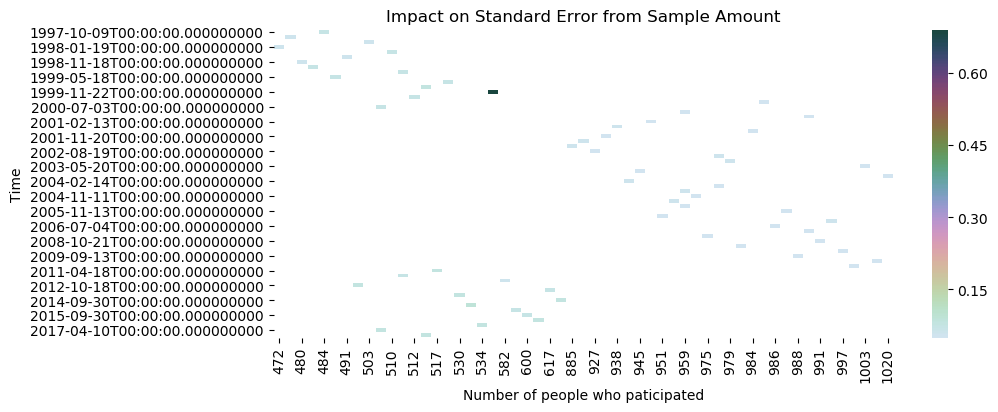

In [180]:
pt = df.pivot_table(index='datetime', columns='Number of rater', values='Error', aggfunc=np.sum)
pt.head()
f, ax = plt.subplots(figsize = (10, 4))
cmap = sns.cubehelix_palette(start = 1, rot = 3, gamma=0.8, as_cmap = True)
sns.heatmap(pt, cmap = cmap, linewidths = 0.05, ax = ax)

ax.set_title('Impact on Standard Error from Sample Amount')
ax.set_xlabel('Number of people who paticipated')
ax.set_ylabel('Time')


In [181]:
# two heatmaps above show that the sample amount will influence on the rating level and the standard error of the investigation. 
# and both impacts seems similar.